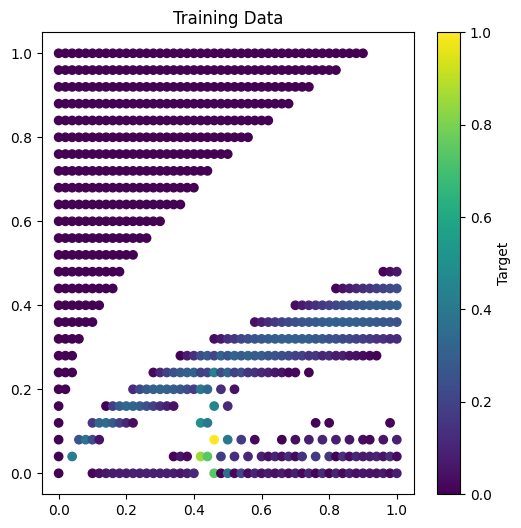

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

EPOCHS = 20000

# Generate random 2D data
# N = 200
# x1, x2 = np.linspace(0, 1, 51), np.linspace(0, 1, 26)  # only trains properly for [0,1]^2
# X1, X2 = np.meshgrid(x1, x2)
# X = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
# X_train = X[np.random.choice(np.arange(X.shape[0]), size=N, replace=False)].copy()
# Y_train = np.random.uniform(0, 1, N)[..., np.newaxis]

# Load data from files
X_train = np.load("../data_out/residual_training_data/X_pos_train_diss.npy")
Y_train = np.load("../data_out/residual_training_data/Y_pos_train_diss.npy")[..., np.newaxis]

# trains OK with size=100
# subset_indices = np.random.choice(np.arange(X_train.shape[0]), size=100, replace=False)
# X_train = X_train[subset_indices].copy()
# Y_train = Y_train[subset_indices].copy()

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train)


# Plot the training data
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="viridis")
plt.title("Training Data")
plt.colorbar(label="Target")
plt.show()

In [123]:

# Create a Keras MLP model
model = keras.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(2048, activation="relu"),
        layers.Dense(1),
    ]
)

# Compile the model
model.compile(loss="mse", optimizer="adam")

# Train the model (intentionally overfitting)
history = model.fit(
    X_train, Y_train, epochs=EPOCHS, batch_size=len(X_train), verbose=0
)
# batch=len(X_train) -> 0.0036 after 2000 epochs in 40s
# batch=32           -> 0.0020 after 2000 epochs in 72s (and much noisier)

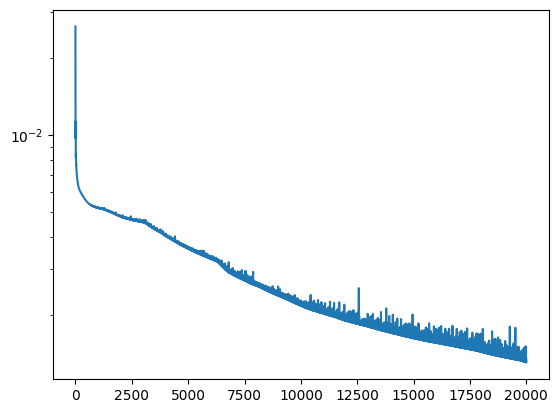

In [124]:
plt.semilogy(history.history["loss"])
plt.show()

Train Loss: 0.0013
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


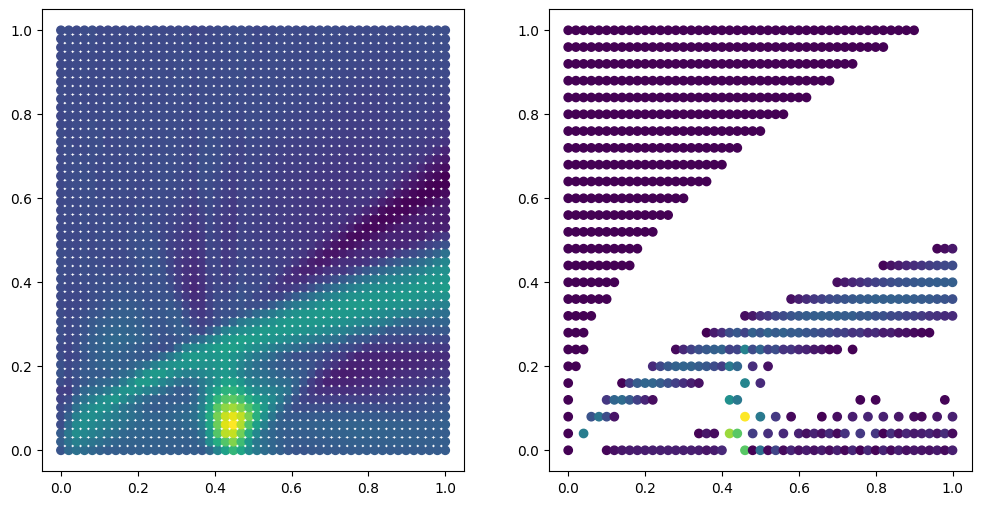

In [125]:

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)

print(f"Train Loss: {train_loss:.4f}")

# Generate predictions for plotting
x1_range = np.linspace(0, X_train[:, 0].max(), 50)
x2_range = np.linspace(0, X_train[:, 1].max(), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
X_pred = np.c_[X1.ravel(), X2.ravel()]
y_pred = model.predict(X_pred)

# Plot the model's predictions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.show()

In [126]:
np.any(X_pred < 0)

False